<a href="https://colab.research.google.com/github/Bmo411/Deeplearning/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam

# Define latent dimension and input shape
latent_dim = 50
input_shape = (32, 32, 3)

def build_encoder(input_shape, latent_dim):
    inputs = Input(shape=input_shape)
    # TODO: Add a Conv2D layer with 16 filters, kernel size (3,3), activation 'relu', strides=1, and padding 'same'
    x = Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same' ,input_shape=(32, 32, 3), strides=1)(inputs)
    # TODO: Add a Conv2D layer with 8 filters, kernel size (3,3), activation 'relu', strides=1, and padding 'same'
    x=Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same', strides=1)(x)
    # TODO: Save the shape before flattening for use in the decoder (e.g., shape_before_flattening = ?)
    shape_before_flattening=x.shape
    # TODO: Flatten the output
    x = Flatten()(x)
    # TODO: Add a Dense layer to produce the latent vector of dimension latent_dim
    latent = Dense(latent_dim)(x)
    latent=Dropout(0.2)(latent)
    # (assign the output of this Dense layer to a variable named "latent")
    encoder = Model(inputs, latent, name="encoder")
    return encoder, shape_before_flattening

def build_decoder(latent_dim, shape_before_flattening):
    latent_inputs = Input(shape=(latent_dim,))

    # TODO: Add a Dense layer to expand the latent vector back to the size of the flattened feature map
    x=Dense(np.prod(shape_before_flattening[1:]))(latent_inputs)
    # TODO: Reshape the expanded vector back to the shape before flattening
    x=Reshape(shape_before_flattening[1:])(x)
    # TODO: Add a Conv2DTranspose layer with 8 filters, kernel size (3,3), activation 'relu', strides=1, and padding 'same'
    x=Conv2D(8, kernel_size=(3, 3), activation='relu',padding='same', strides=1)(x)
    # TODO: Add a Conv2DTranspose layer with 16 filters, kernel size (3,3), activation 'relu', strides=1, and padding 'same'
    x = Conv2D(16, kernel_size=(3, 3), activation='relu',padding='same', strides=1)(x)
    # TODO: Add a final Conv2D layer with 3 filters, kernel size (1,1), activation 'sigmoid', and padding 'same'
    outputs = Conv2D(3, kernel_size=(1, 1), activation='sigmoid',padding='same', strides=1)(x)
    # (assign the output of this layer to a variable named "outputs")

    decoder = Model(latent_inputs, outputs, name="decoder")
    return decoder


In [ ]:
# Build encoder and decoder
encoder, shape_before_flattening = build_encoder(input_shape, latent_dim)
decoder = build_decoder(latent_dim, shape_before_flattening)

# Create the full autoencoder by connecting encoder and decoder
input_img = Input(shape=input_shape)
latent_repr = encoder(input_img)
reconstructed_img = decoder(latent_repr)
autoencoder = Model(input_img, reconstructed_img, name="autoencoder")

# TODO: Compile the autoencoder with an optimizer (e.g., Adam) and a loss function (e.g., 'binary_crossentropy')
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

autoencoder.summary()

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Functional)                 │ (None, 50)                  │         411,258 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 32, 32, 3)           │         419,595 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830,853 (3.17 MB)

 Trainable params: 830,853 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Load CIFAR-10 data and normalize pixel values to [0, 1]
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.

In [ ]:
# train
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - loss: 0.6254 - val_loss: 0.5778
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.5743 - val_loss: 0.5745
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.5739 - val_loss: 0.5736
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5729 - val_loss: 0.5734
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5722 - val_loss: 0.5733
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5721 - val_loss: 0.5726
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5712 - val_loss: 0.5722
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5719 - val_loss: 0.5721
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5707 - val_loss: 0.5722
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5705 - val_loss: 0.5718


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


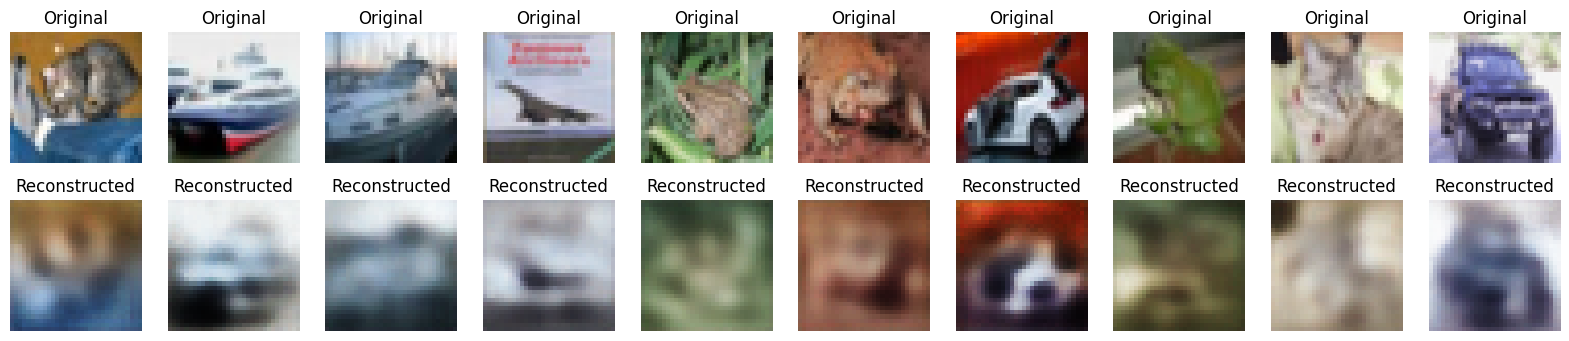

In [ ]:
# Reconstruct images from the test set
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images side by side
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()